In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds.csv", encoding='latin-1')

# This is a diamond dataset. I will be predicting Price of a diamond based on different variables.

- **price**: price in US dollars (\326--\18,823)
- **carat**: weight of the diamond (0.2--5.01)
- **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: diamond colour, from J (worst) to D (best)
- **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: length in mm (0--10.74)
- **y**: width in mm (0--58.9)
- **z**: depth in mm (0--31.8)
- **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table**: width of top of diamond relative to widest point (43--95)

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#Check for nulls
nulls = df.isnull().sum()
print("Nulls:")
print(nulls)

Nulls:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [7]:
#Let's drop this unnamed column since it is irrelevant
df = df.drop(columns='Unnamed: 0')

In [8]:
#Let's convert some of our categorical variables to dummies
df = pd.get_dummies(df, columns=['cut','color','clarity'])
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'Feature importance correlation')

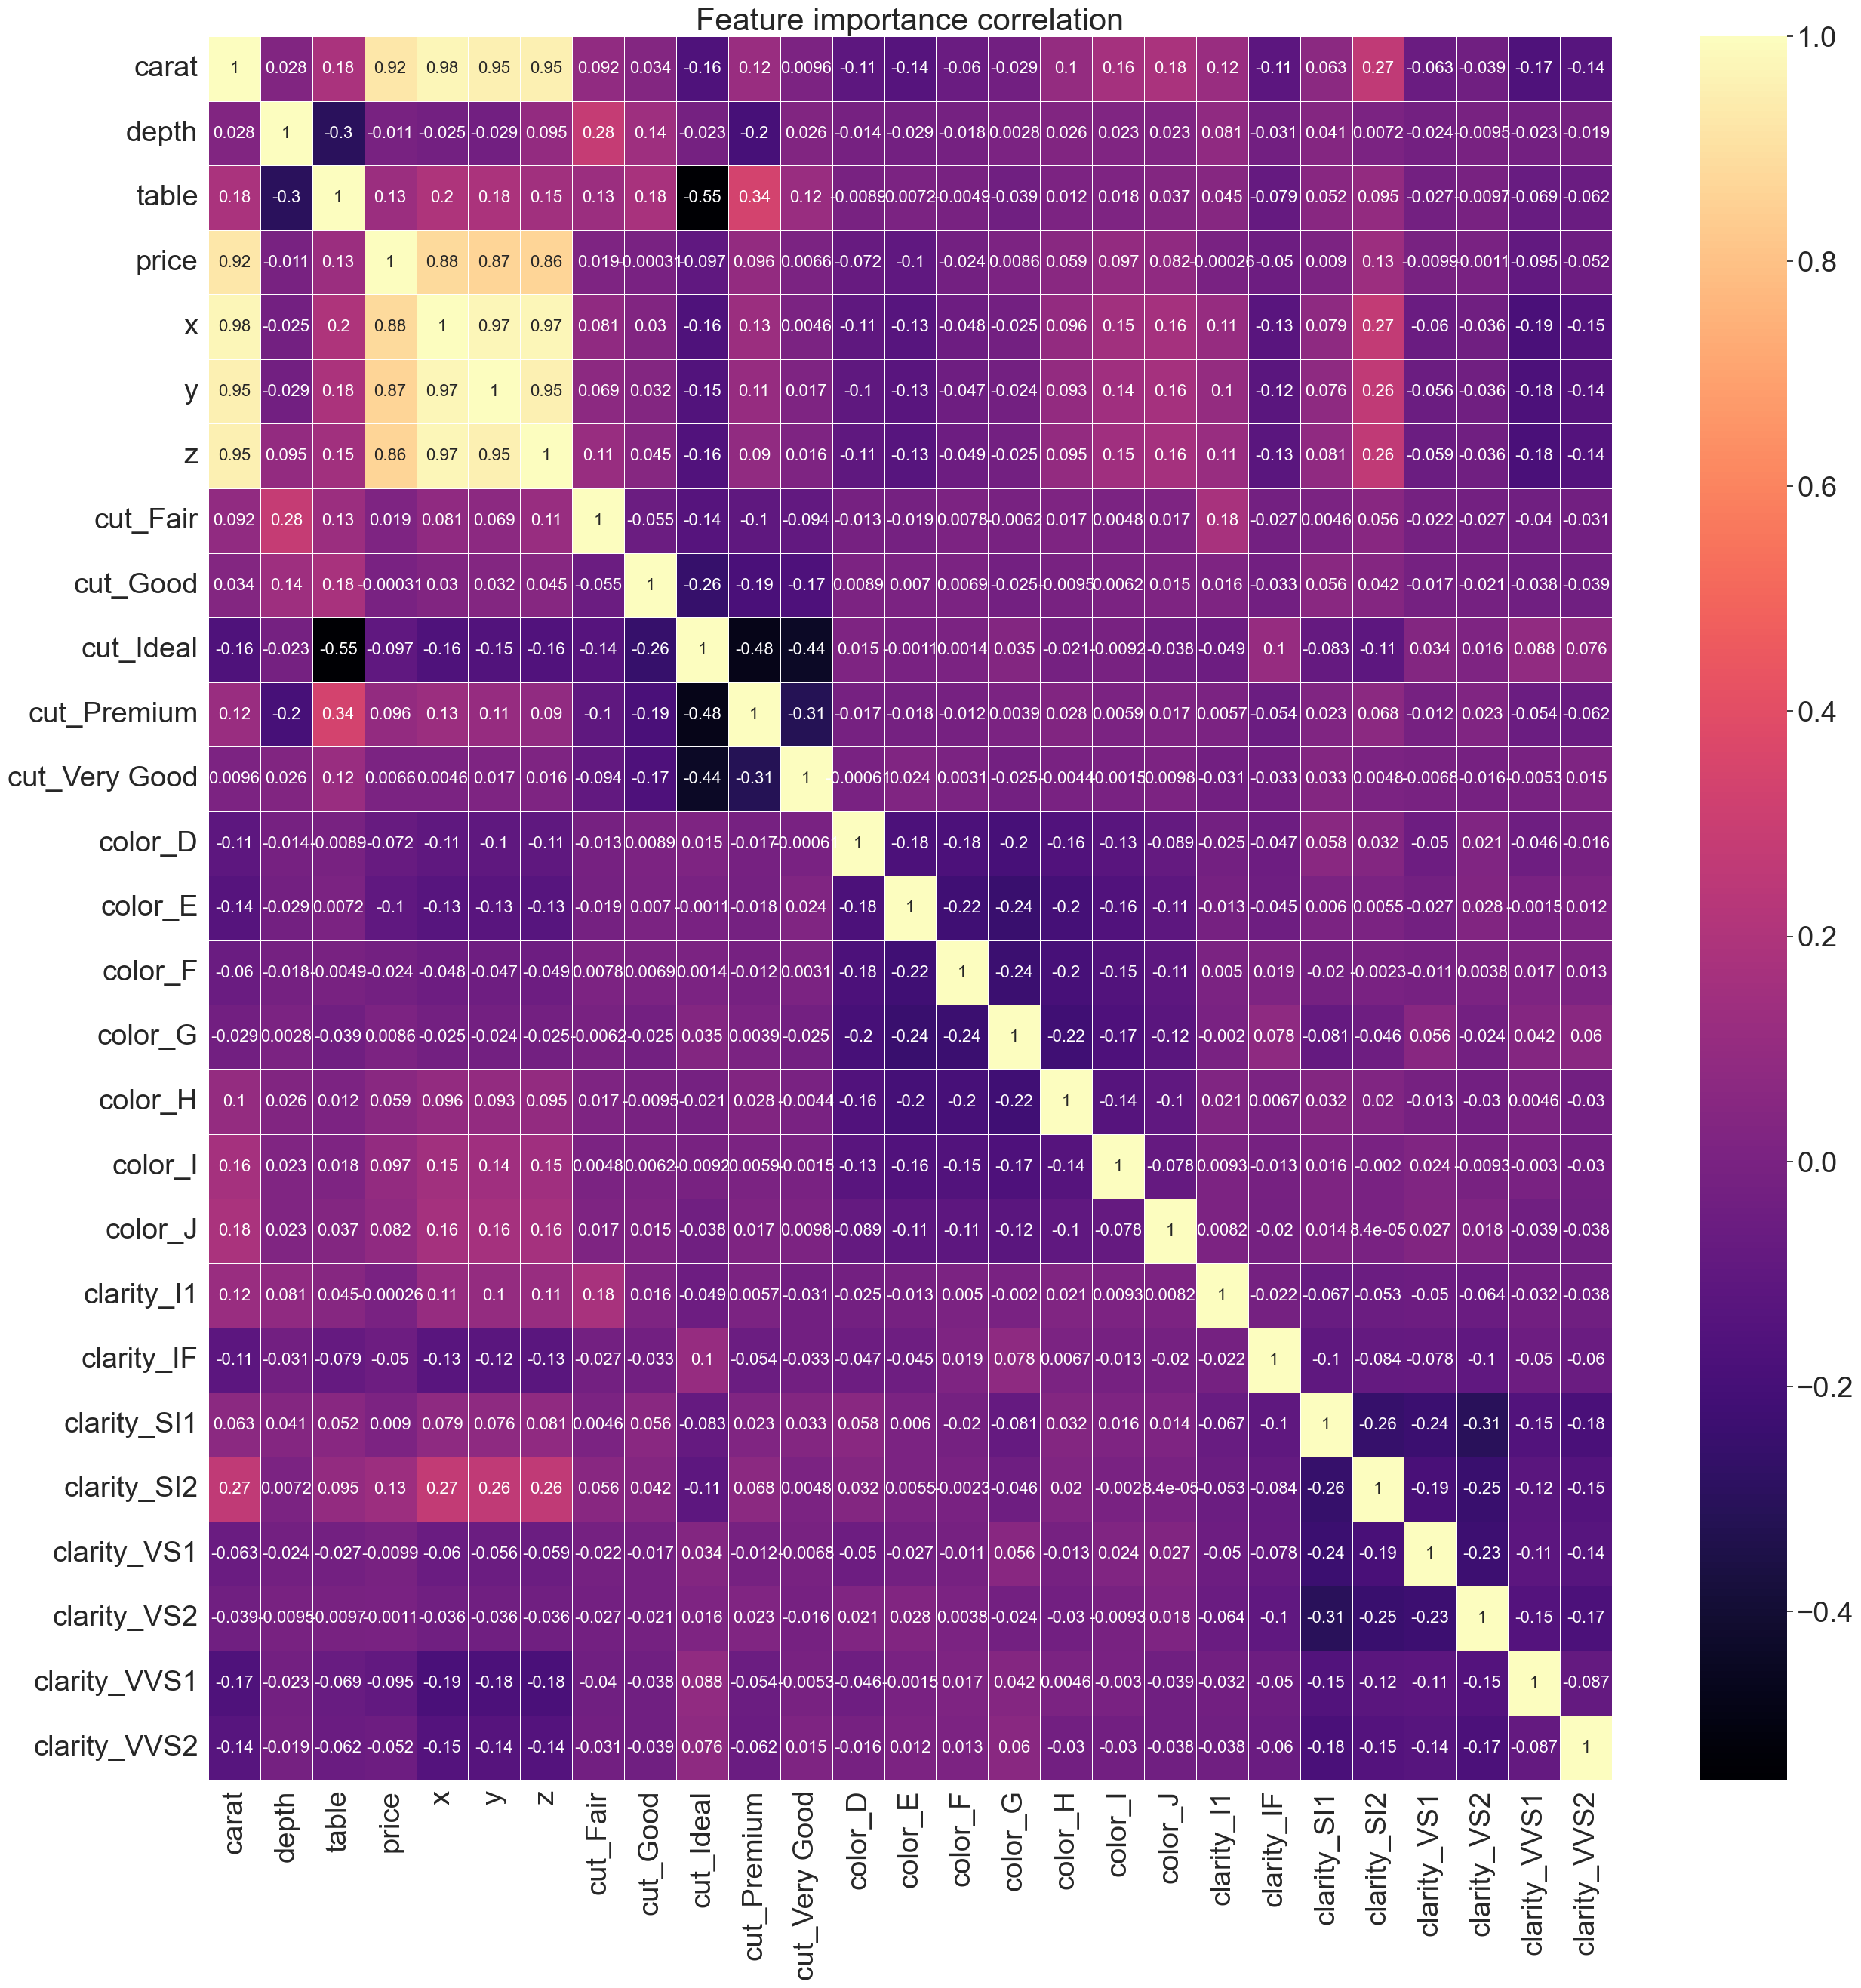

In [9]:
#Heatmap time! My favorite
plt.figure(figsize = (30,30))
sns.set(font_scale=2.5)
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap ='magma', annot_kws={"size": 16})
plt.title("Feature importance correlation")

As we can see from our heat map, some important variables for predicting Price in Diamonds are as followed: Carat, X, Y, and Z.

# Modeling for Experiment 1

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## For my first experiment, I will use all columns, just to see how it performs. 

In [11]:
#Splitting my data into predictor variables and my target variable of Price
X = df.drop(columns=['price'])
y = df['price']

In [12]:
#Constructing my trest and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
#Fitting our linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Predictions for test set
y_pred1 = model.predict(X_test)

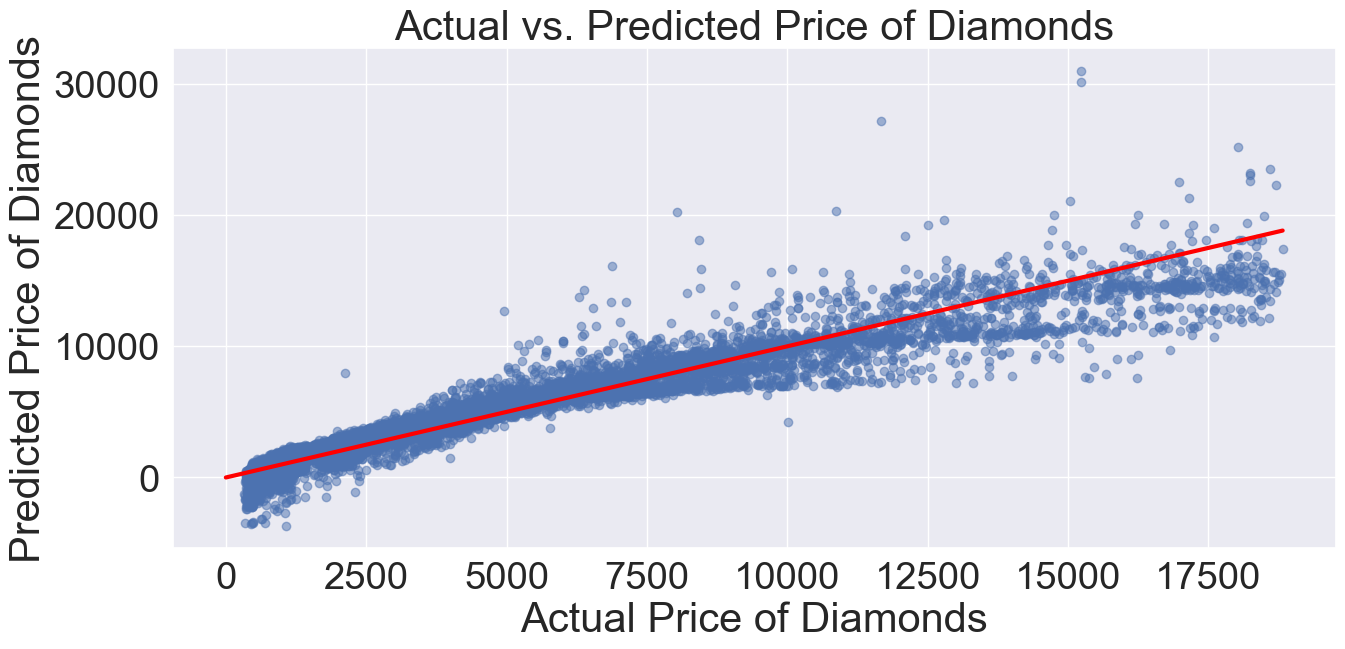

In [15]:
#Scatter plot!
plt.figure(figsize=(15, 6.5))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.xlabel("Actual Price of Diamonds")
plt.ylabel("Predicted Price of Diamonds")
plt.title("Actual vs. Predicted Price of Diamonds")
plt.grid(True)

#Gotta add our line
plt.plot([0, max(y_test)], [0,max(y_test)], color='red', linestyle='-', linewidth=3)

plt.show()

In [16]:
#Evaluation
model.score(X_test, y_test)

0.9200299928874693

# Wow this is really good actually! 92% right off the bat is really good. Let's try to improve it by isolating the more important predictors.

## Experiment 2

In [17]:
X2 = df[['carat' , 'x' , 'y' , 'z']]
y2 = df['price']

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)

In [19]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [20]:
y_pred2 = model2.predict(X2_test)

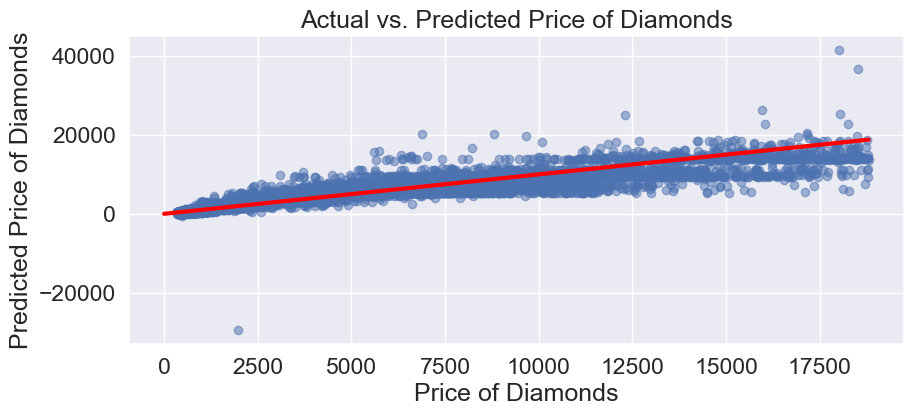

In [34]:
#Scatter plot!
plt.figure(figsize=(10, 4))
plt.scatter(y2_test, y_pred2, alpha=0.5)
plt.xlabel("Price of Diamonds")
plt.ylabel("Predicted Price of Diamonds")
plt.title("Actual vs. Predicted Price of Diamonds")
plt.grid(True)

#Gotta add our line
plt.plot([0, max(y2_test)], [0,max(y2_test)], color='red', linestyle='-', linewidth=3)

plt.show()

In [22]:
model2.score(X2_test, y2_test)

0.8513837390087386

# So this model performs a little worse than the model before, which makes sense. We removed predictor variables, and typically the more variables you use as predictors, the more accurate your model will be

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

#RMSE For experiment 1
rmse1 = mean_squared_error(y_test, y_pred1, squared=False)

#R2 (Coefficient of Determination) for experiment 1
r2_1 = r2_score(y_test, y_pred1)

print("RMSE:", rmse1)
print("R-squared (COD):", r2_1)

RMSE: 1120.4893583957507
R-squared (COD): 0.9200299928874693


## So our R2 is going to be the same as our model score, I just wanted to use the SKlearn metric model to calculate it myself. It basically tells us how good our line fits. Our RMSE provides am easure of how close the predicted values are to our actual values.

In [24]:
#RMSE For experiment 2
rmse2 = mean_squared_error(y2_test, y_pred2, squared=False)

#R2 (Coefficient of Determination) for experiment 2
r2_2 = r2_score(y2_test, y_pred2)

print("RMSE:", rmse2)
print("R-squared (COD):", r2_2)

RMSE: 1546.7672306049897
R-squared (COD): 0.8513837390087386


# Experiment 3: Decision Tree Regression

## I will go back to using all my variables for this experiment.

In [25]:
from sklearn import tree

In [26]:
model3 = tree.DecisionTreeRegressor()
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred3 = model3.predict(X_test)

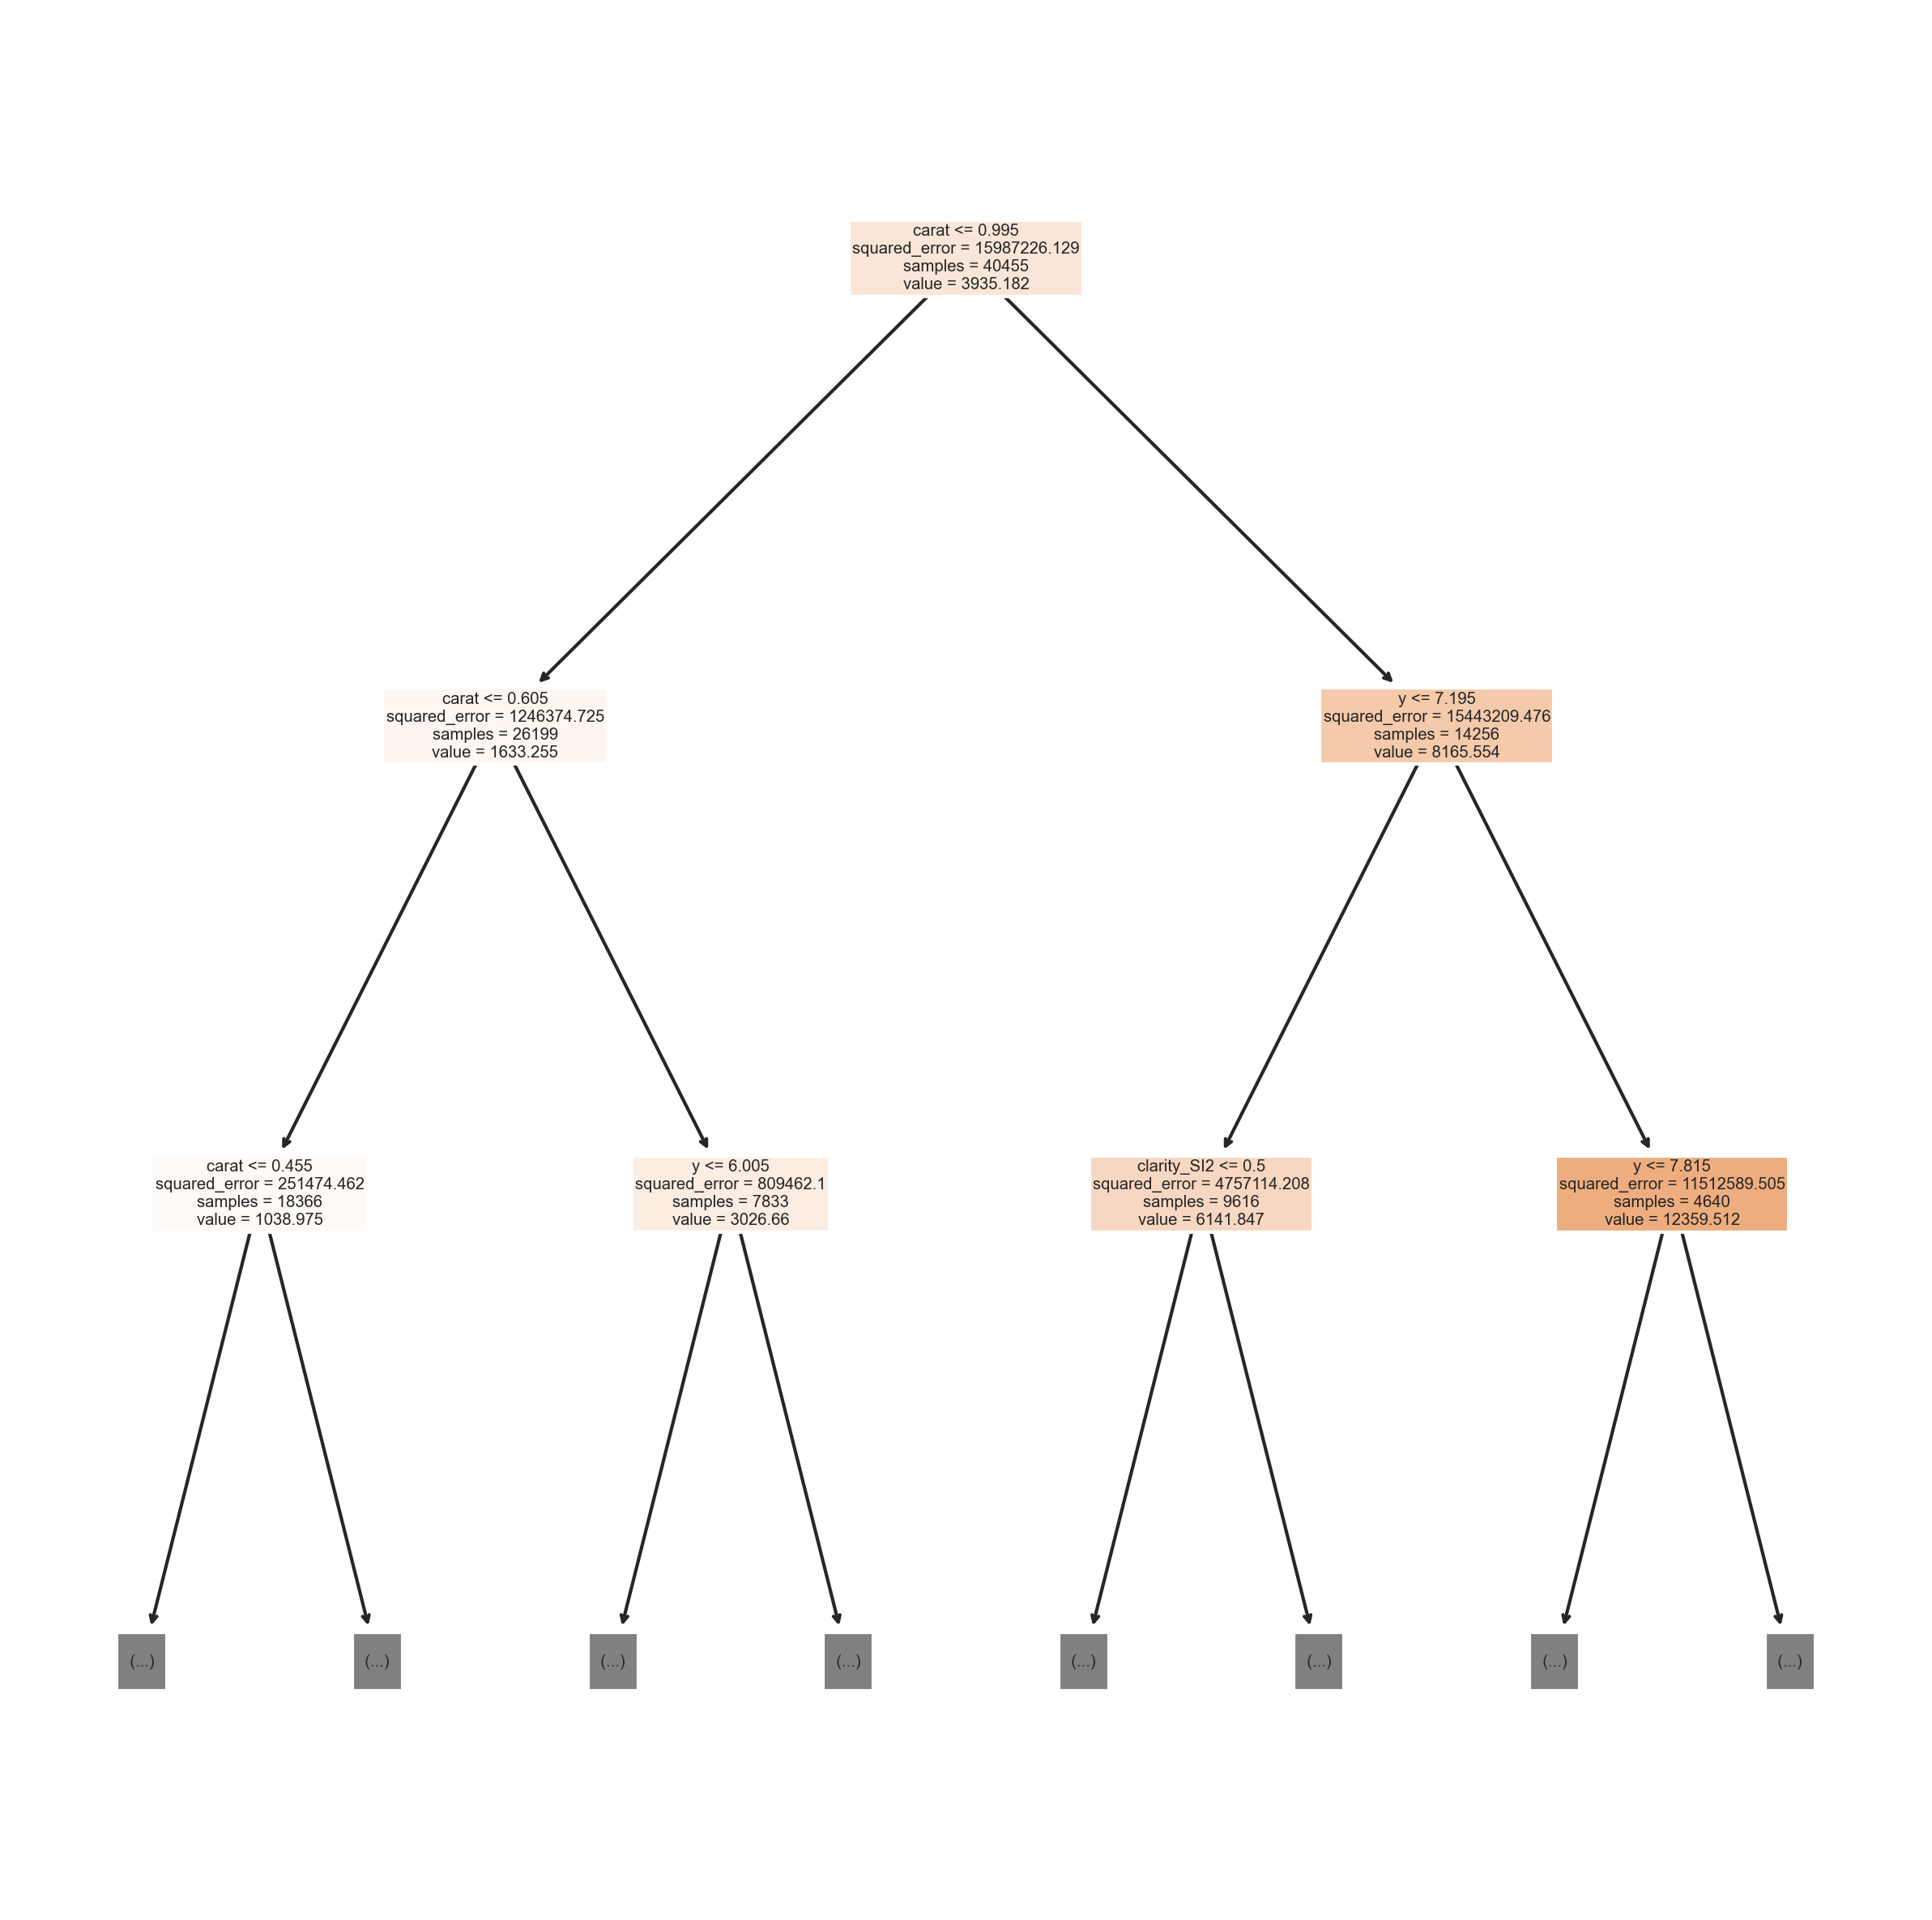

In [28]:
sns.set(font_scale=1.50)
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
tree.plot_tree(model3, max_depth=2, feature_names = X.columns.tolist(), filled=True)
plt.show()

In [29]:
#RMSE For experiment 3
rmse3 = mean_squared_error(y_test, y_pred3, squared=False)

#R2 (Coefficient of Determination) for experiment 3
r2_3 = r2_score(y_test, y_pred3)

print("RMSE:", rmse3)
print("R-squared (COD):", r2_3)

RMSE: 758.0739021981426
R-squared (COD): 0.963395476866131


# Wow! This model performed the best so far! Our RMSE is relatively low (as compared to my other models at least) and our accuracy is at a 97%

In [30]:
fi = model3.feature_importances_ 
fi = pd.Series(data = fi, index = X.columns) 
fi.sort_values(ascending=False, inplace=True) 

C:\Users\Spencer\AppData\Local\Temp\ipykernel_11600\3385411861.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


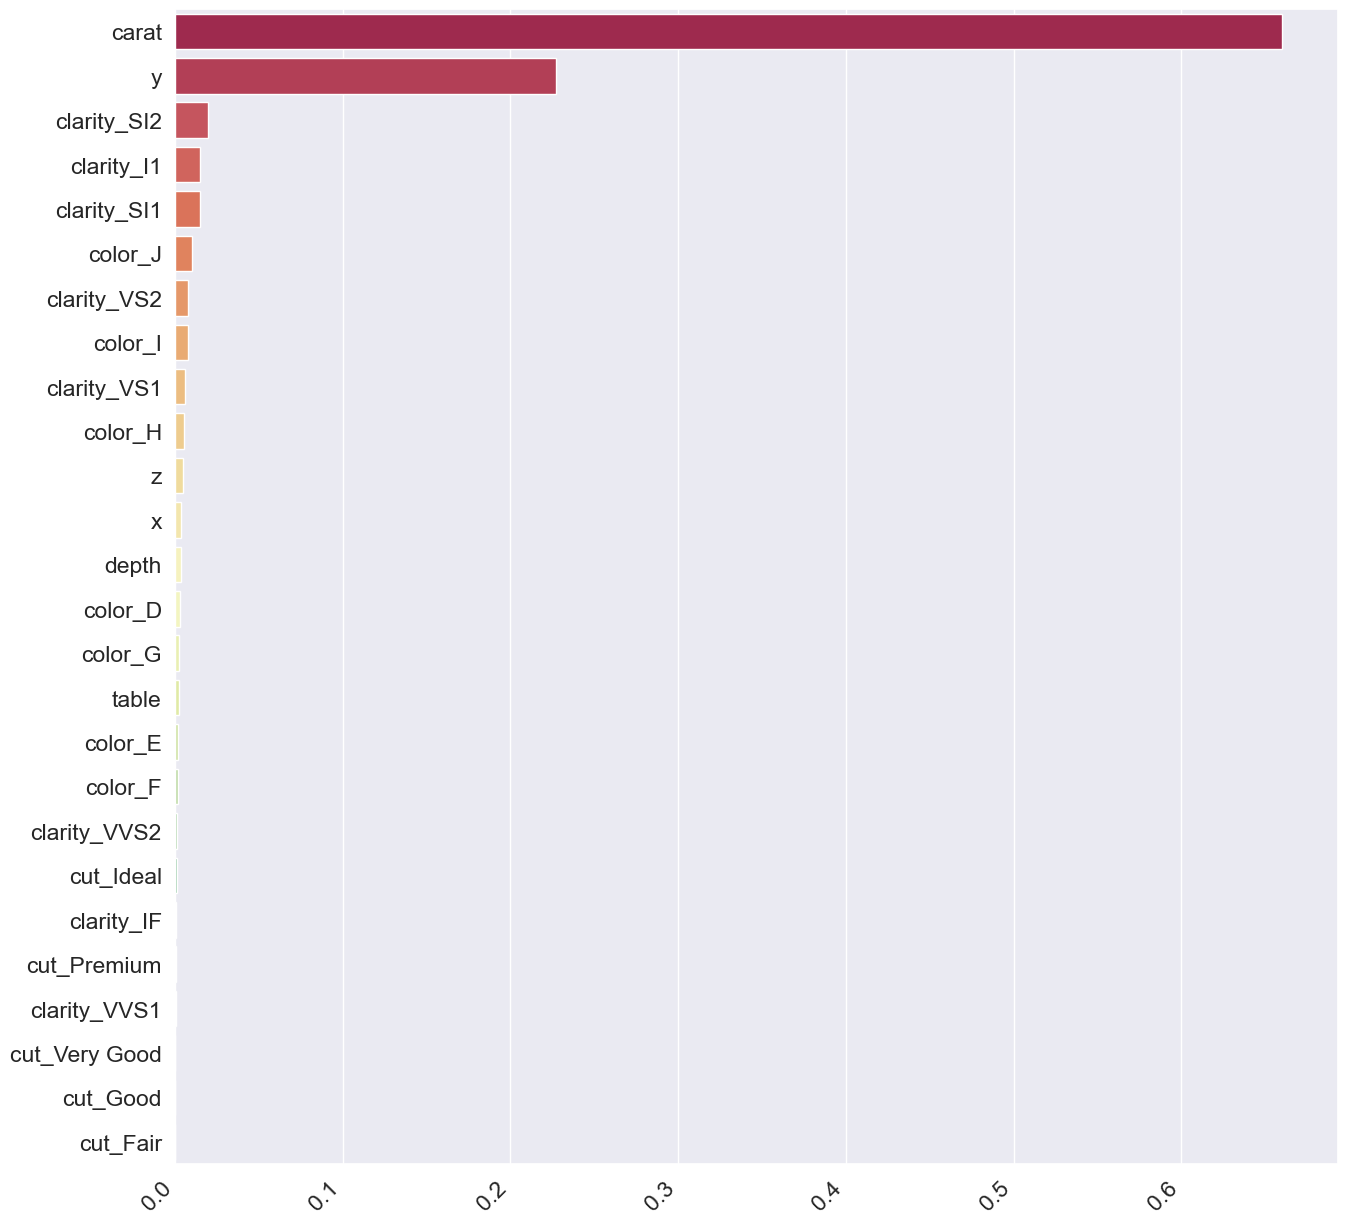

In [31]:
plt.figure(figsize=(15, 15))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("Spectral", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# As we can see here, carat was by far the most important variable predictor, followed by y and some of our more pure clarity values